In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/Preparation/ensemble_tenchiques"

/content/drive/MyDrive/Preparation/ensemble_tenchiques


In [ ]:
!ls

 Dataset  'Loan Prediction.ipynb'


## Import libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.metrics import accuracy_score

%matplotlib inline

## EDA 

In [ ]:
## Read data
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')

In [ ]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Data Visualization

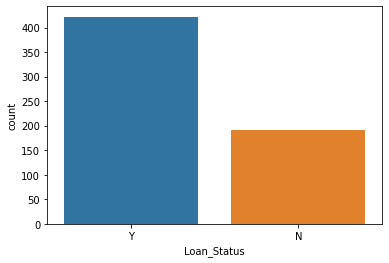

In [ ]:
sns.countplot(x = 'Loan_Status', data = train_data)
plt.show()

## Data Preprocessing

In [ ]:
train_data['Gender'].value_counts()

train_data['Gender'] = train_data['Gender'].fillna('Male')
test_data['Gender'] = test_data['Gender'].fillna('Male')

train_data['Married'].value_counts()

train_data['Married'] = train_data['Married'].fillna('Yes')
test_data['Married'] = test_data['Married'].fillna('Yes')

train_data['Dependents'].value_counts()

train_data['Dependents'] = train_data['Dependents'].fillna('0')
test_data['Dependents'] = test_data['Dependents'].fillna('0')

train_data['Self_Employed'].value_counts()

train_data['Self_Employed'] = train_data['Self_Employed'].fillna('No')
test_data['Self_Employed'] = test_data['Self_Employed'].fillna('No')

train_data['LoanAmount'].describe()

median_val = np.nanmedian(train_data['LoanAmount'])
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(median_val)
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(median_val)

train_data['Loan_Amount_Term'].describe()

median_val = np.nanmedian(train_data['Loan_Amount_Term'])
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(median_val)
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(median_val)

train_data['Credit_History'].describe()

median_val = np.nanmedian(train_data['Credit_History'])
train_data['Credit_History'] = train_data['Credit_History'].fillna(median_val)
test_data['Credit_History'] = test_data['Credit_History'].fillna(median_val)

In [ ]:
train_data = train_data.drop(['Loan_ID'], axis=1)
test_data = test_data.drop(['Loan_ID'], axis=1)

In [ ]:
le = LabelEncoder()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
test_data['Gender'] = le.transform(test_data['Gender'])

le = LabelEncoder()
train_data['Married'] = le.fit_transform(train_data['Married'])
test_data['Married'] = le.transform(test_data['Married'])

le = LabelEncoder()
train_data['Dependents'] = le.fit_transform(train_data['Dependents'])
test_data['Dependents'] = le.transform(test_data['Dependents'])

le = LabelEncoder()
train_data['Education'] = le.fit_transform(train_data['Education'])
test_data['Education'] = le.transform(test_data['Education'])

le = LabelEncoder()
train_data['Self_Employed'] = le.fit_transform(train_data['Self_Employed'])
test_data['Self_Employed'] = le.transform(test_data['Self_Employed'])

le = LabelEncoder()
train_data['Property_Area'] = le.fit_transform(train_data['Property_Area'])
test_data['Property_Area'] = le.transform(test_data['Property_Area'])

le = LabelEncoder()
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])

In [ ]:
## separate dependent and independent variables from train data
X = train_data.drop(['Loan_Status'], axis=1)
y = train_data['Loan_Status']

pipeline = Pipeline([
                     ('std_scaler', StandardScaler())
])

col_names = list(X.columns)

X = pd.DataFrame(pipeline.fit_transform(X), columns=col_names)
test_data = pd.DataFrame(pipeline.transform(test_data), columns=col_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Size Of The Train Data :- {len(X_train)}")
print(f"Size Of The Test Data :- {len(X_test)}")
print(f"Size Of The Validation Data :- {len(test_data)}")

Size Of The Train Data :- 552
Size Of The Test Data :- 62
Size Of The Validation Data :- 367


## Building Model

#### Simple Ensemble techniques
##### 1. max voting
##### 2. averaging
##### 3. weighted averaging

##### Max Voting Technique

In [ ]:
lr_model = LogisticRegression(random_state=1)
dt_model = DecisionTreeClassifier(random_state=1)
random_forest_model = RandomForestClassifier(random_state=1)
voting_clf_model = VotingClassifier(estimators=[('lr', lr_model), ('dt', dt_model), ('rf', random_forest_model)], voting='hard')
voting_clf_model.fit(X_train, y_train)
voting_clf_model.score(X_test, y_test)

0.7419354838709677

##### Average based Techniques

In [ ]:
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()

dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

pred_1 = dt_model.predict_proba(X_test)
pred_2 = knn_model.predict_proba(X_test)
pred_3 = lr_model.predict_proba(X_test)

finalpred = (pred_1 + pred_2 + pred_3)/3
# finalpred

#### Advance Ensemble techniques
##### 1. Stacking
##### 2. Blending
##### 3. Bagging
######   1 . Bagging meta-estimator
###### 2 . Random Forest
##### 4. Boosting

##### Bagging.  (Bagging meta-estimator)

In [ ]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7419354838709677

In [ ]:
model = BaggingClassifier(base_estimator=LogisticRegression(random_state=1))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7580645161290323

In [ ]:
model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7419354838709677

In [ ]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7741935483870968

##### Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7580645161290323

##### Ada Boost

In [ ]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7258064516129032

In [ ]:
model = AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7580645161290323

##### GBM

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.01, random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7580645161290323

##### XGBM

In [ ]:
model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test, y_test)

75.80645161290323

##### Light GBM

In [ ]:
model = lgbm.LGBMClassifier(learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7580645161290323

In [ ]:
train_data_1 = lgbm.Dataset(X_train, y_train)
params = {'learning_rate':0.01}
model= lgbm.train(params, train_data_1, 100) 
y_pred=model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i]>=0.5: 
    y_pred[i]=1
  else:
    y_pred[i]=0

accuracy_score(y_test, y_pred)

0.7580645161290323